In [8]:
import astropy.time
import astropy.units as u
from aiapy.response import Channel

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import ChiantiPy.core as ch
import ChiantiPy.tools.filters as chfilters

In [11]:
from scipy import signal

In [12]:
c1 = Channel(1600*u.angstrom)

In [24]:
c11 = Channel(1600*u.angstrom)

In [27]:
c2 = Channel(1700*u.angstrom)

In [14]:
r1 = c1.wavelength_response()

In [26]:
r11 = c11.wavelength_response()

In [28]:
r2 = c2.wavelength_response()

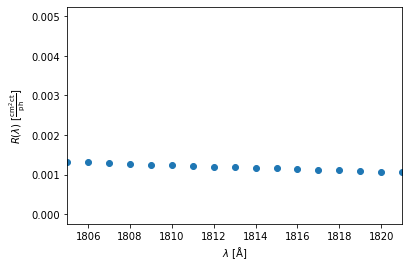

In [10]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(c2.wavelength, r2)
ax.set_xlim(1805,1821)
#ax.set_ylim(0, 0.03)
ax.set_xlabel(r'$\lambda$ [Å]')
ax.set_ylabel(f'$R(\\lambda)$ [{r2.unit.to_string("latex")}]')
plt.show()

# # Flare Data Number

In [16]:
si2 = ch.ion('si_2',temperature=31622.8,eDensity=1.e+14,em=2.e+30)
wvl=1520. + 0.035*np.arange(500)
si2.spectrum(wvl,filter=(chfilters.gaussian,0.15))
#si2.spectrum(wvl,filter=(chfilters.boxcar,1))

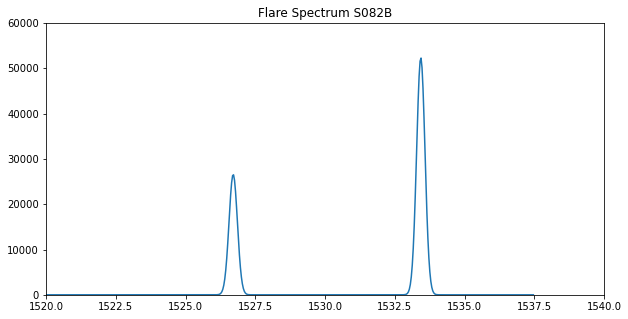

In [9]:
plt.figure(figsize=(10,5))
plt.title("Flare Spectrum S082B")
plt.plot(wvl, si2.Spectrum['intensity'])
plt.xlim([1520,1540])
plt.ylim([0,60000])
plt.show()

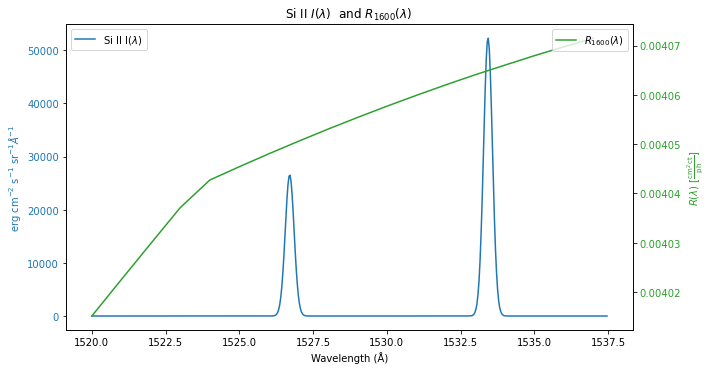

In [13]:

fig,ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel(si2.Spectrum['ylabel'], color=color)
ax1.plot(wvl, si2.Spectrum['intensity'], color=color,label='Si II I($\lambda$) ')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel(f'$R(\\lambda)$ [{r1.unit.to_string("latex")}]', color=color)  # we already handled the x-label with ax1
ax2.plot(c1.wavelength[320:338],r1[320:338], color=color,label='$R_{1600}(\lambda)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Si II $I(\lambda)$  and $R_{1600}(\lambda)$ ")
plt.savefig('convolution_1.jpg')
plt.show()


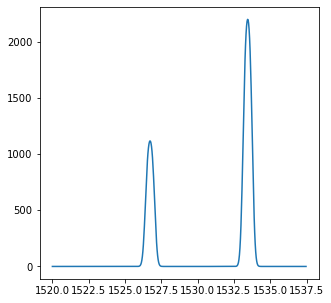

In [40]:
plt.figure(figsize=(5,5))
plt.plot(wvl, np.convolve(A11,B11,'same'))
#plt.xlim([1525,1528])
#plt.ylim([0,800])
#plt.show()

In [21]:
c1.wavelength[320:338]

<Quantity [1520., 1521., 1522., 1523., 1524., 1525., 1526., 1527., 1528.,
           1529., 1530., 1531., 1532., 1533., 1534., 1535., 1536., 1537.] Angstrom>

In [17]:
A11=r1[320:338]

In [12]:
B11=si2.Spectrum['intensity']

In [18]:
A12=r2[320:338]

(0.1, 10000.0)

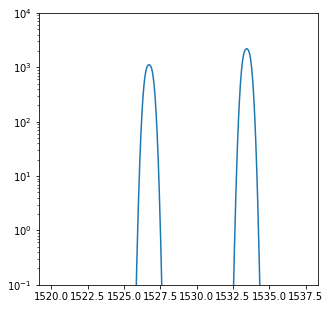

In [16]:
plt.figure(figsize=(5,5))
plt.semilogy(wvl, np.convolve(A11,B11,'same'))
plt.ylim([1.e-1,1.e+4])

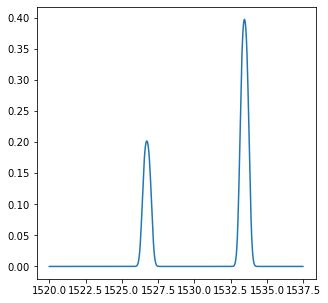

In [41]:
plt.figure(figsize=(5,5))
plt.plot(wvl, np.convolve(A12,B11,'same'))

In [15]:
np.convolve(A11,B11,'same').shape

(500,)

In [22]:
wvl[320:450]

array([1531.2  , 1531.235, 1531.27 , 1531.305, 1531.34 , 1531.375,
       1531.41 , 1531.445, 1531.48 , 1531.515, 1531.55 , 1531.585,
       1531.62 , 1531.655, 1531.69 , 1531.725, 1531.76 , 1531.795,
       1531.83 , 1531.865, 1531.9  , 1531.935, 1531.97 , 1532.005,
       1532.04 , 1532.075, 1532.11 , 1532.145, 1532.18 , 1532.215,
       1532.25 , 1532.285, 1532.32 , 1532.355, 1532.39 , 1532.425,
       1532.46 , 1532.495, 1532.53 , 1532.565, 1532.6  , 1532.635,
       1532.67 , 1532.705, 1532.74 , 1532.775, 1532.81 , 1532.845,
       1532.88 , 1532.915, 1532.95 , 1532.985, 1533.02 , 1533.055,
       1533.09 , 1533.125, 1533.16 , 1533.195, 1533.23 , 1533.265,
       1533.3  , 1533.335, 1533.37 , 1533.405, 1533.44 , 1533.475,
       1533.51 , 1533.545, 1533.58 , 1533.615, 1533.65 , 1533.685,
       1533.72 , 1533.755, 1533.79 , 1533.825, 1533.86 , 1533.895,
       1533.93 , 1533.965, 1534.   , 1534.035, 1534.07 , 1534.105,
       1534.14 , 1534.175, 1534.21 , 1534.245, 1534.28 , 1534.

In [20]:
from scipy import integrate

In [28]:
integrate.simps(np.convolve(A11,B11,'same')[150:250],wvl[150:250])

729.0782922410859

In [32]:
integrate.simps(np.convolve(A12,B11,'same')[150:250],wvl[150:250])

0.13186718567170902

In [38]:
integrate.simps(np.convolve(A11,B11,'same')[320:450],wvl[320:450])

1435.3994093004612

In [39]:
integrate.simps(np.convolve(A12,B11,'same')[320:450],wvl[320:450])

0.2596183186821518

In [42]:
c4 = ch.ion('c_4',temperature=1.e+5,eDensity=1.e+14,em=5.e+28)
wvl2=1540. + 0.035*np.arange(600)
c4.spectrum(wvl2,filter=(chfilters.gaussian,0.15))

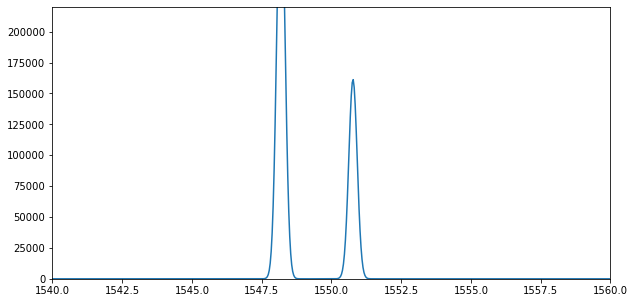

In [43]:
plt.figure(figsize=(10,5))
plt.plot(wvl2, c4.Spectrum['intensity'])
plt.xlim([1540,1560])
plt.ylim([0,220000])
plt.show()

In [45]:
c1.wavelength[340:361]

<Quantity [1540., 1541., 1542., 1543., 1544., 1545., 1546., 1547., 1548.,
           1549., 1550., 1551., 1552., 1553., 1554., 1555., 1556., 1557.,
           1558., 1559., 1560.] Angstrom>

In [40]:
A21=r1[340:361]
A22=r2[340:361]

In [47]:
B12=c4.Spectrum['intensity']

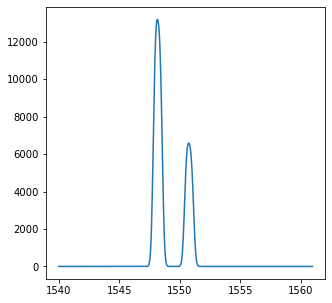

In [69]:
plt.figure(figsize=(5,5))
plt.plot(wvl2, np.convolve(A21,B12,'same'))

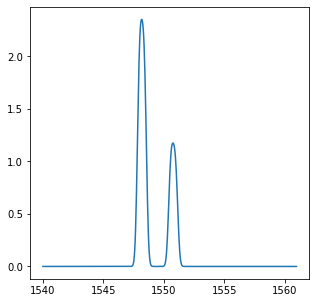

In [70]:
plt.figure(figsize=(5,5))
plt.plot(wvl2, np.convolve(A22,B12,'same'))

In [51]:
wvl2.shape

(600,)

In [41]:
wvl2[170:270]

array([1545.95 , 1545.985, 1546.02 , 1546.055, 1546.09 , 1546.125,
       1546.16 , 1546.195, 1546.23 , 1546.265, 1546.3  , 1546.335,
       1546.37 , 1546.405, 1546.44 , 1546.475, 1546.51 , 1546.545,
       1546.58 , 1546.615, 1546.65 , 1546.685, 1546.72 , 1546.755,
       1546.79 , 1546.825, 1546.86 , 1546.895, 1546.93 , 1546.965,
       1547.   , 1547.035, 1547.07 , 1547.105, 1547.14 , 1547.175,
       1547.21 , 1547.245, 1547.28 , 1547.315, 1547.35 , 1547.385,
       1547.42 , 1547.455, 1547.49 , 1547.525, 1547.56 , 1547.595,
       1547.63 , 1547.665, 1547.7  , 1547.735, 1547.77 , 1547.805,
       1547.84 , 1547.875, 1547.91 , 1547.945, 1547.98 , 1548.015,
       1548.05 , 1548.085, 1548.12 , 1548.155, 1548.19 , 1548.225,
       1548.26 , 1548.295, 1548.33 , 1548.365, 1548.4  , 1548.435,
       1548.47 , 1548.505, 1548.54 , 1548.575, 1548.61 , 1548.645,
       1548.68 , 1548.715, 1548.75 , 1548.785, 1548.82 , 1548.855,
       1548.89 , 1548.925, 1548.96 , 1548.995, 1549.03 , 1549.

In [73]:
integrate.simps(np.convolve(A21,B12,'same')[170:270],wvl2[170:270])

9802.3779449167

In [78]:
integrate.simps(np.convolve(A21,B12,'same')[270:370],wvl2[270:370])

4895.968771035457

In [76]:
integrate.simps(np.convolve(A22,B12,'same')[170:270],wvl2[170:270])


1.7519250473787318

In [79]:
integrate.simps(np.convolve(A22,B12,'same')[270:370],wvl2[270:370])

0.8750295458303028

In [80]:
c1 = ch.ion('c_1',temperature=15848.0,eDensity=1.e+14,em=1.1*1.e+31)
wvl3=1555. + 0.035*np.arange(300)
#c1.spectrum(wvl3,filter=(chfilters.boxcar,1))
c1.spectrum(wvl3,filter=(chfilters.gaussian,.15))

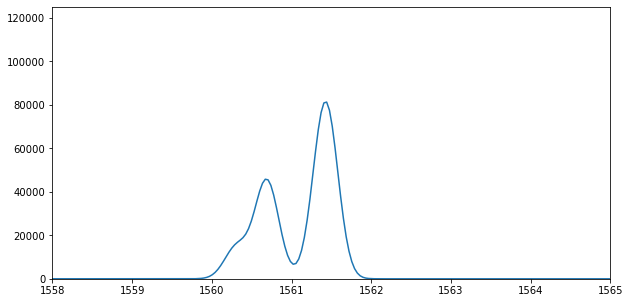

In [81]:
plt.figure(figsize=(10,5))
plt.plot(wvl3, c1.Spectrum['intensity'])
plt.xlim([1558,1565])
plt.ylim([0,125000])
plt.show()

In [14]:
A31=r1[358:365]
A32=r2[340:365]
B13=c1.Spectrum['intensity']

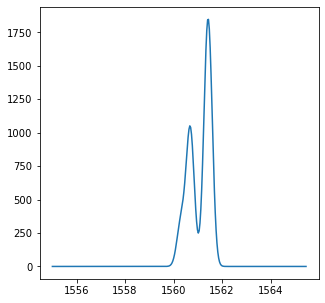

In [84]:
plt.figure(figsize=(5,5))
plt.plot(wvl3, np.convolve(A31,B13,'same'))

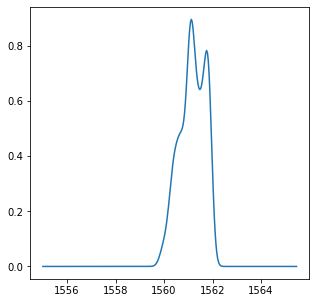

In [85]:
plt.figure(figsize=(5,5))
plt.plot(wvl3, np.convolve(A32,B13,'same'))

In [88]:
integrate.simps(np.convolve(A31,B13,'same'),wvl3)

1356.5325628913629

In [89]:
integrate.simps(np.convolve(A32,B13,'same'),wvl3)

1.1833858991988966

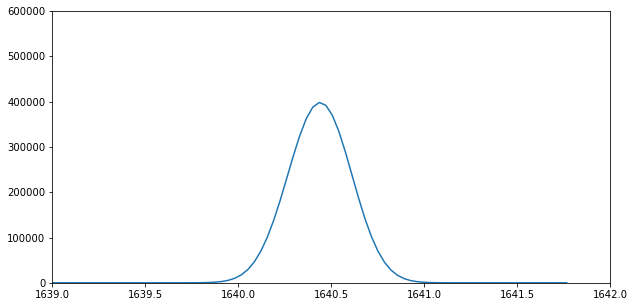

In [92]:
he2 = ch.ion('he_2',temperature=79432.8,eDensity=1.e+14,em=1.e+30)
wvl4=1639. + 0.035*np.arange(80)
he2.spectrum(wvl4,filter=(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl4,he2.Spectrum['intensity'])
plt.xlim([1639,1642])
plt.ylim([0,600000])
plt.show()

In [25]:
A41=r1[439:443]
A42=r2[439:443]
B14=he2.Spectrum['intensity']

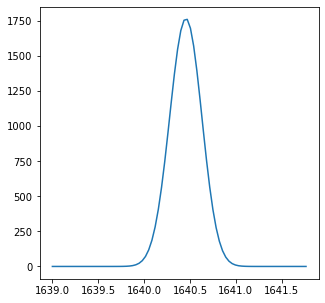

In [95]:
plt.figure(figsize=(5,5))
plt.plot(wvl4, np.convolve(A41,B14,'same'))

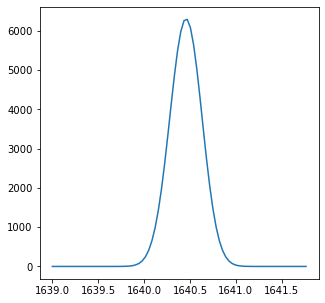

In [96]:
plt.figure(figsize=(5,5))
plt.plot(wvl4, np.convolve(A42,B14,'same'))

In [97]:
integrate.simps(np.convolve(A41,B14,'same'),wvl4)

769.6527684454522

In [98]:
integrate.simps(np.convolve(A42,B14,'same'),wvl4)

2746.536941556581

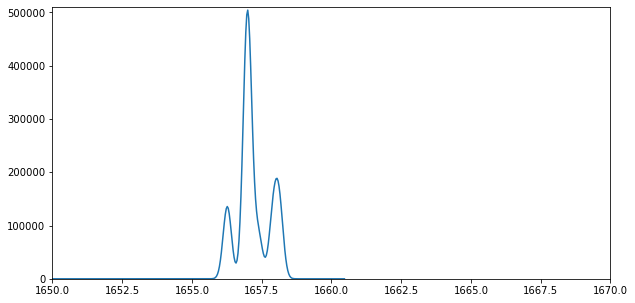

In [30]:
c1 = ch.ion('c_1',temperature=15848.0,eDensity=1.e+14,em=1.5*1.e+32)
wvl5=1650. + 0.035*np.arange(300)
c1.spectrum(wvl5,(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl5, c1.Spectrum['intensity'])
plt.xlim([1650,1670])
plt.ylim([0,510000])
plt.show()

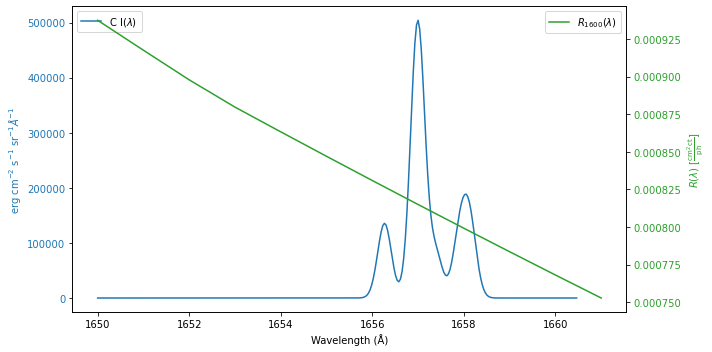

In [49]:
fig,ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel(c1.Spectrum['ylabel'], color=color)
ax1.plot(wvl5, c1.Spectrum['intensity'], color=color,label='C I($\lambda$) ')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel(f'$R(\\lambda)$ [{r11.unit.to_string("latex")}]', color=color)  # we already handled the x-label with ax1
ax2.plot(c11.wavelength[450:462],r11[450:462], color=color,label='$R_{1600}(\lambda)$')
#ax2.plot(c2.wavelength[450:462],r2[450:462], color=red,label='$R_{1700}(\lambda)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title("C I $I(\lambda)$  and $R_{1600}(\lambda)$ ")
plt.savefig('convolution_1.jpg')
plt.show()


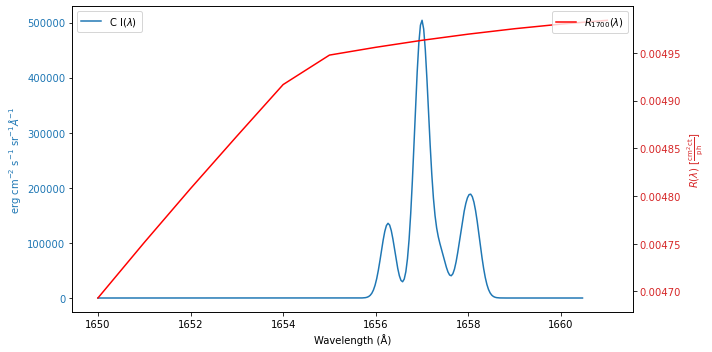

In [50]:
fig,ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel(c1.Spectrum['ylabel'], color=color)
ax1.plot(wvl5, c1.Spectrum['intensity'], color=color,label='C I($\lambda$) ')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel(f'$R(\\lambda)$ [{r11.unit.to_string("latex")}]', color=color)  # we already handled the x-label with ax1
#ax2.plot(c11.wavelength[450:462],r11[450:462], color=color,label='$R_{1600}(\lambda)$')
ax2.plot(c2.wavelength[450:462],r2[450:462], color='red',label='$R_{1700}(\lambda)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title("C I $(\lambda)$  and $R_{1700}(\lambda)$ ")
plt.savefig('convolution_2.jpg')
plt.show()


In [37]:
A51=r1[450:462]
A52=r2[450:462]
B15=c1.Spectrum['intensity']

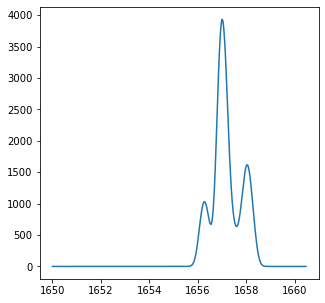

In [103]:
plt.figure(figsize=(5,5))
plt.plot(wvl5,np.convolve(A51,B15,'same'))

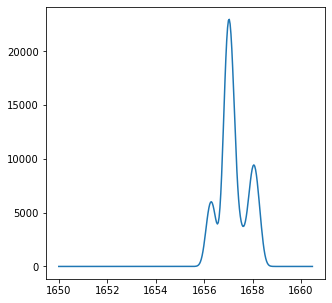

In [104]:
plt.figure(figsize=(5,5))
plt.plot(wvl5,np.convolve(A52,B15,'same'))

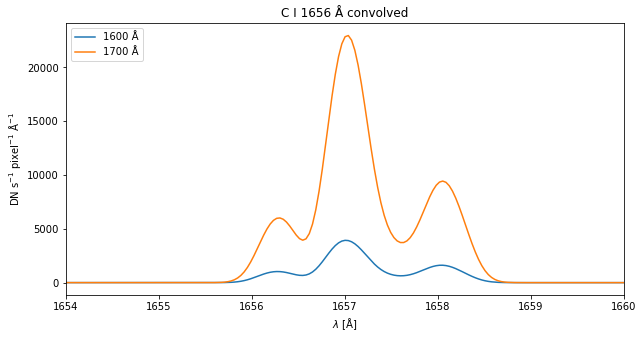

In [51]:
plt.figure(figsize=(10,5))
plt.plot(wvl5,np.convolve(A51,B15,'same'),label='1600 Å')
plt.plot(wvl5,np.convolve(A52,B15,'same'),label='1700 Å')
plt.title('C I 1656 Å convolved')
plt.xlabel(r'$\lambda$ [Å]')
plt.ylabel('DN s$^{-1}$ pixel$^{-1}$ Å$^{-1}$')
plt.xlim([1654,1660])
plt.legend(loc='upper left')
plt.savefig('convolution_3.jpg')
plt.show()

In [105]:
integrate.simps(np.convolve(A51,B15,'same'),wvl5)

3687.1373806930446

In [106]:
integrate.simps(np.convolve(A52,B15,'same'),wvl5)

21486.05742479166

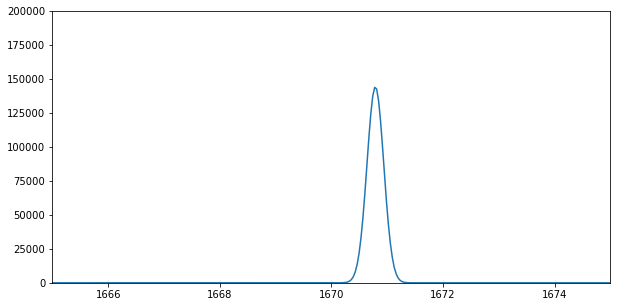

In [108]:
al2=ch.ion('al_2',temperature=31622.77,eDensity=1.e+14,em=1.5*1.e+30)
wvl6=1665.+ 0.035*np.arange(300)
#al2.spectrum(wvl6,(chfilters.boxcar,1))
al2.spectrum(wvl6,(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl6, al2.Spectrum['intensity'])
plt.xlim([1665,1675])
plt.ylim([0,200000])
plt.show()

In [47]:
A61=r1[465:476]
A62=r2[465:476]
B16=al2.Spectrum['intensity']

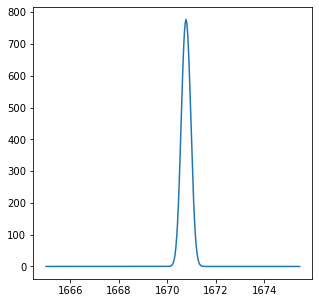

In [115]:
plt.figure(figsize=(5,5))
plt.plot(wvl6,np.convolve(A61,B16,'same'))

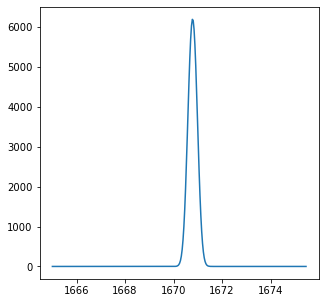

In [116]:
plt.figure(figsize=(5,5))
plt.plot(wvl6,np.convolve(A62,B16,'same'))

In [117]:
integrate.simps(np.convolve(A61,B16,'same'),wvl6)

372.9686503745895

In [118]:
integrate.simps(np.convolve(A62,B16,'same'),wvl6)

2981.3227100668446

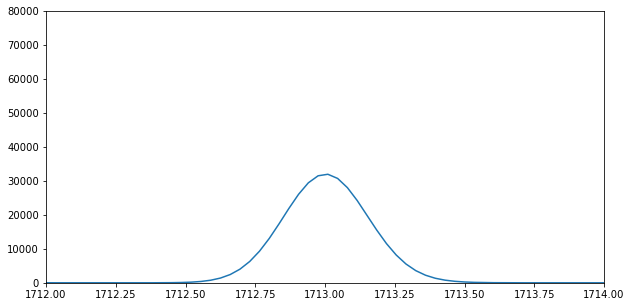

In [122]:
fe2=ch.ion('fe_2',temperature=31622.77,eDensity=1.e+14,em=5.e+31)
wvl7=1710.+ 0.035*np.arange(275)
fe2.spectrum(wvl7,(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl7, fe2.Spectrum['intensity'])
plt.xlim([1712,1714])
plt.ylim([0,80000])
plt.show()

In [59]:
A71=r1[512:521]
A72=r2[512:521]
B17=fe2.Spectrum['intensity']

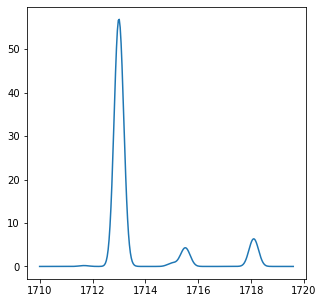

In [130]:
plt.figure(figsize=(5,5))
plt.plot(wvl7,np.convolve(A71,B17,'same'))

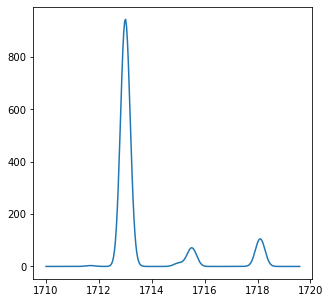

In [146]:
plt.figure(figsize=(5,5))
plt.plot(wvl7,np.convolve(A72,B17,'same'))

In [145]:
wvl7[70:120]

array([1712.45 , 1712.485, 1712.52 , 1712.555, 1712.59 , 1712.625,
       1712.66 , 1712.695, 1712.73 , 1712.765, 1712.8  , 1712.835,
       1712.87 , 1712.905, 1712.94 , 1712.975, 1713.01 , 1713.045,
       1713.08 , 1713.115, 1713.15 , 1713.185, 1713.22 , 1713.255,
       1713.29 , 1713.325, 1713.36 , 1713.395, 1713.43 , 1713.465,
       1713.5  , 1713.535, 1713.57 , 1713.605, 1713.64 , 1713.675,
       1713.71 , 1713.745, 1713.78 , 1713.815, 1713.85 , 1713.885,
       1713.92 , 1713.955, 1713.99 , 1714.025, 1714.06 , 1714.095,
       1714.13 , 1714.165])

In [147]:
integrate.simps(np.convolve(A71,B17,'same')[70:120],wvl7[70:120])

25.646474017558898

In [150]:
integrate.simps(np.convolve(A71,B17,'same'),wvl7)

30.853064744076164

In [148]:
integrate.simps(np.convolve(A72,B17,'same')[70:120],wvl7[70:120])

425.3445363488177

In [149]:
integrate.simps(np.convolve(A72,B17,'same'),wvl7)

511.6839275833941

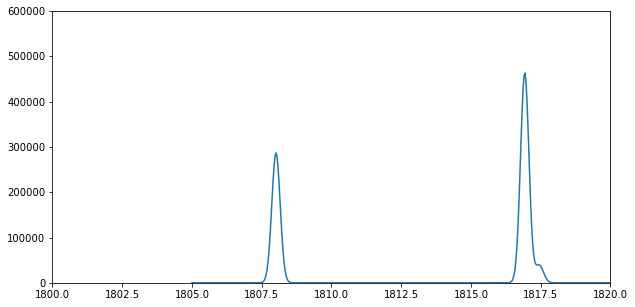

In [151]:
si2=ch.ion('si_2',temperature=31622.77,eDensity=1.e+13,em=7.e+30)
wvl8=1805.+ 0.035*np.arange(450)
si2.spectrum(wvl8,filter=(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl8,si2.Spectrum['intensity'])
plt.xlim([1800,1820])
plt.ylim([0,600000])
plt.show()

In [68]:
A81=r1[605:621]
A82=r2[605:621]
B18=si2.Spectrum['intensity']

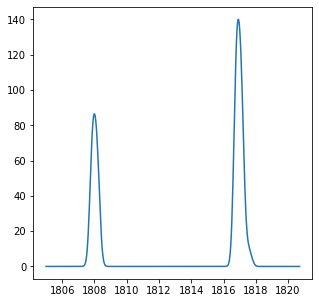

In [153]:
plt.figure(figsize=(5,5))
plt.plot(wvl8,np.convolve(A81,B18,'same'))

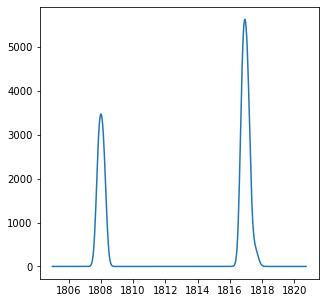

In [154]:
plt.figure(figsize=(5,5))
plt.plot(wvl8,np.convolve(A82,B18,'same'))

In [155]:
wvl8.shape

(450,)

In [157]:
wvl8[50:150]

array([1806.75 , 1806.785, 1806.82 , 1806.855, 1806.89 , 1806.925,
       1806.96 , 1806.995, 1807.03 , 1807.065, 1807.1  , 1807.135,
       1807.17 , 1807.205, 1807.24 , 1807.275, 1807.31 , 1807.345,
       1807.38 , 1807.415, 1807.45 , 1807.485, 1807.52 , 1807.555,
       1807.59 , 1807.625, 1807.66 , 1807.695, 1807.73 , 1807.765,
       1807.8  , 1807.835, 1807.87 , 1807.905, 1807.94 , 1807.975,
       1808.01 , 1808.045, 1808.08 , 1808.115, 1808.15 , 1808.185,
       1808.22 , 1808.255, 1808.29 , 1808.325, 1808.36 , 1808.395,
       1808.43 , 1808.465, 1808.5  , 1808.535, 1808.57 , 1808.605,
       1808.64 , 1808.675, 1808.71 , 1808.745, 1808.78 , 1808.815,
       1808.85 , 1808.885, 1808.92 , 1808.955, 1808.99 , 1809.025,
       1809.06 , 1809.095, 1809.13 , 1809.165, 1809.2  , 1809.235,
       1809.27 , 1809.305, 1809.34 , 1809.375, 1809.41 , 1809.445,
       1809.48 , 1809.515, 1809.55 , 1809.585, 1809.62 , 1809.655,
       1809.69 , 1809.725, 1809.76 , 1809.795, 1809.83 , 1809.

In [166]:
integrate.simps(np.convolve(A81,B18,'same')[50:150],wvl8[50:150])

51.32385157148155

In [167]:
integrate.simps(np.convolve(A82,B18,'same')[50:150],wvl8[50:150])

2065.034168267703

In [165]:
wvl8[300:400]

array([1815.5  , 1815.535, 1815.57 , 1815.605, 1815.64 , 1815.675,
       1815.71 , 1815.745, 1815.78 , 1815.815, 1815.85 , 1815.885,
       1815.92 , 1815.955, 1815.99 , 1816.025, 1816.06 , 1816.095,
       1816.13 , 1816.165, 1816.2  , 1816.235, 1816.27 , 1816.305,
       1816.34 , 1816.375, 1816.41 , 1816.445, 1816.48 , 1816.515,
       1816.55 , 1816.585, 1816.62 , 1816.655, 1816.69 , 1816.725,
       1816.76 , 1816.795, 1816.83 , 1816.865, 1816.9  , 1816.935,
       1816.97 , 1817.005, 1817.04 , 1817.075, 1817.11 , 1817.145,
       1817.18 , 1817.215, 1817.25 , 1817.285, 1817.32 , 1817.355,
       1817.39 , 1817.425, 1817.46 , 1817.495, 1817.53 , 1817.565,
       1817.6  , 1817.635, 1817.67 , 1817.705, 1817.74 , 1817.775,
       1817.81 , 1817.845, 1817.88 , 1817.915, 1817.95 , 1817.985,
       1818.02 , 1818.055, 1818.09 , 1818.125, 1818.16 , 1818.195,
       1818.23 , 1818.265, 1818.3  , 1818.335, 1818.37 , 1818.405,
       1818.44 , 1818.475, 1818.51 , 1818.545, 1818.58 , 1818.

In [168]:
integrate.simps(np.convolve(A81,B18,'same')[300:400],wvl8[300:400])

89.76136998347478

In [169]:
integrate.simps(np.convolve(A82,B18,'same')[300:400],wvl8[300:400])

3611.5819512927546

# Plague data number


efewfwe

In [14]:
si2 = ch.ion('si_2',temperature=31622.8,eDensity=1.e+11,em=5.e+29)
wvl=1520. + 0.035*np.arange(500)
si2.spectrum(wvl,filter=(chfilters.gaussian,0.15))
#si2.spectrum(wvl,filter=(chfilters.boxcar,1))

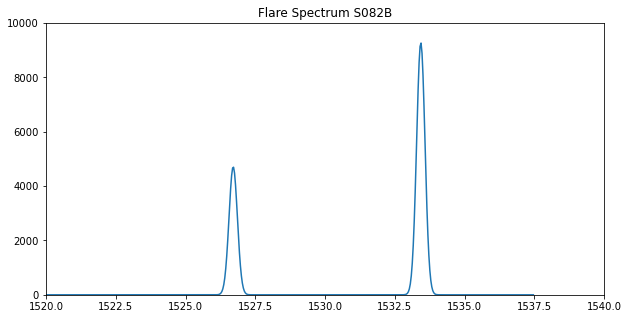

In [16]:
plt.figure(figsize=(10,5))
plt.title("Flare Spectrum S082B")
plt.plot(wvl, si2.Spectrum['intensity'])
plt.xlim([1520,1540])
plt.ylim([0,10000])
plt.show()

In [24]:
B21=si2.Spectrum['intensity']

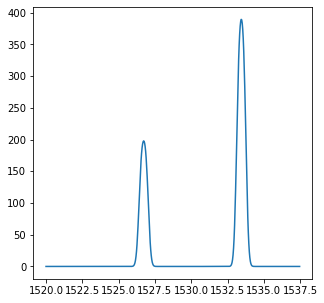

In [20]:
plt.figure(figsize=(5,5))
plt.plot(wvl, np.convolve(A11,B21,'same'))
#plt.xlim([1525,1528])
#plt.ylim([0,800])
#plt.show()

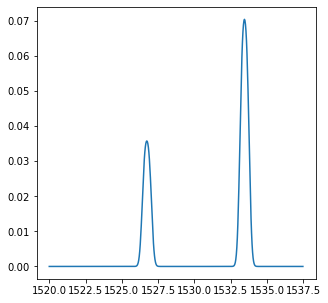

In [21]:
plt.figure(figsize=(5,5))
plt.plot(wvl, np.convolve(A12,B21,'same'))

In [25]:
integrate.simps(np.convolve(A11,B21,'same')[150:250],wvl[150:250])

129.2110559204688

In [26]:
integrate.simps(np.convolve(A11,B21,'same')[320:450],wvl[320:450])

254.38896661320456

In [27]:
integrate.simps(np.convolve(A12,B21,'same')[150:250],wvl[150:250])

0.023370190119812003

In [28]:
integrate.simps(np.convolve(A12,B21,'same')[320:450],wvl[320:450])

0.04601091192840648

In [29]:
c4 = ch.ion('c_4',temperature=1.e+5,eDensity=1.e+11,em=3.e+27)
wvl2=1540. + 0.035*np.arange(600)
c4.spectrum(wvl2,filter=(chfilters.gaussian,0.15))

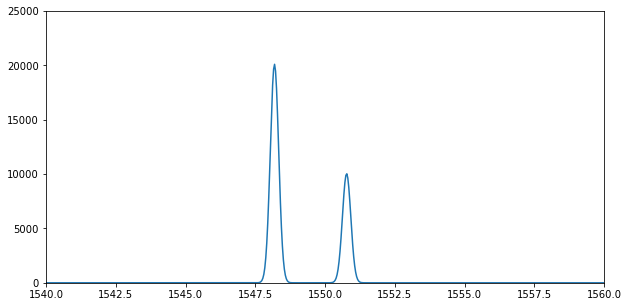

In [31]:
plt.figure(figsize=(10,5))
plt.plot(wvl2, c4.Spectrum['intensity'])
plt.xlim([1540,1560])
plt.ylim([0,25000])
plt.show()

In [35]:
B22=c4.Spectrum['intensity']

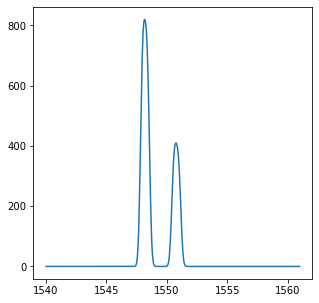

In [36]:
plt.figure(figsize=(5,5))
plt.plot(wvl2, np.convolve(A21,B22,'same'))

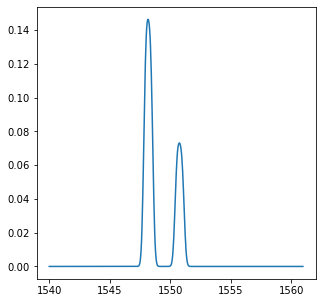

In [37]:
plt.figure(figsize=(5,5))
plt.plot(wvl2, np.convolve(A22,B22,'same'))

In [43]:
integrate.simps(np.convolve(A21,B22,'same')[170:270],wvl2[170:270])

609.6794058251832

In [44]:
integrate.simps(np.convolve(A22,B22,'same')[170:270],wvl2[170:270])

0.10896464387909276

In [45]:
integrate.simps(np.convolve(A21,B22,'same')[270:370],wvl2[270:370])

304.53639195624885

In [46]:
integrate.simps(np.convolve(A22,B22,'same')[270:370],wvl2[270:370])

0.05442811284229607

In [11]:
c1 = ch.ion('c_1',temperature=15848.0,eDensity=1.e+11,em=6.e+29)
wvl3=1555. + 0.035*np.arange(300)
#c1.spectrum(wvl3,filter=(chfilters.boxcar,1))
c1.spectrum(wvl3,filter=(chfilters.gaussian,.15))

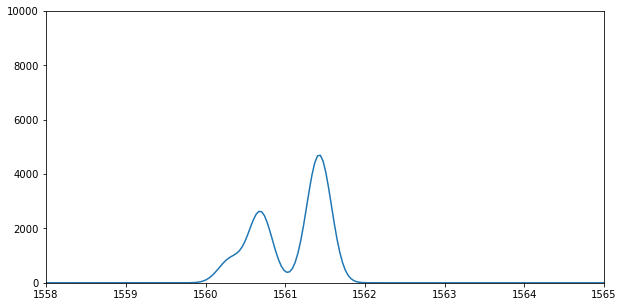

In [13]:
plt.figure(figsize=(10,5))
plt.plot(wvl3, c1.Spectrum['intensity'])
plt.xlim([1558,1565])
plt.ylim([0,10000])
plt.show()

In [15]:
B23=c1.Spectrum['intensity']

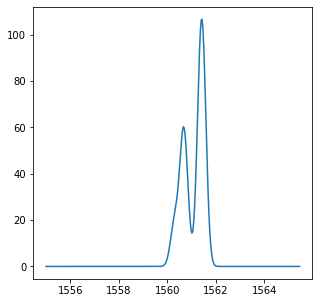

In [17]:
plt.figure(figsize=(5,5))
plt.plot(wvl3, np.convolve(A31,B23,'same'))

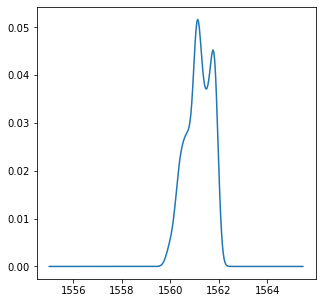

In [18]:
plt.figure(figsize=(5,5))
plt.plot(wvl3, np.convolve(A32,B23,'same'))

In [21]:
integrate.simps(np.convolve(A31,B23,'same'),wvl3)

78.10893905473432

In [22]:
integrate.simps(np.convolve(A32,B23,'same'),wvl3)

0.06813918044233562

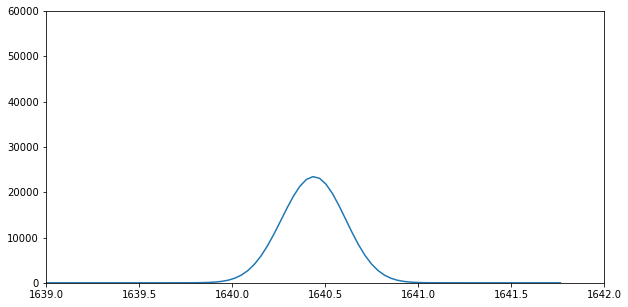

In [24]:
he2 = ch.ion('he_2',temperature=79432.8,eDensity=1.e+11,em=6.5e+28)
wvl4=1639. + 0.035*np.arange(80)
he2.spectrum(wvl4,filter=(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl4,he2.Spectrum['intensity'])
plt.xlim([1639,1642])
plt.ylim([0,60000])
plt.show()

In [26]:
B24=he2.Spectrum['intensity']

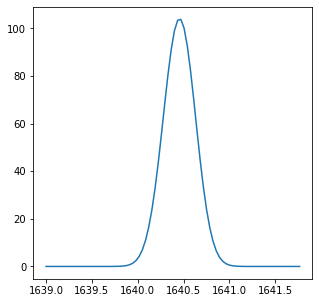

In [27]:
plt.figure(figsize=(5,5))
plt.plot(wvl4, np.convolve(A41,B24,'same'))

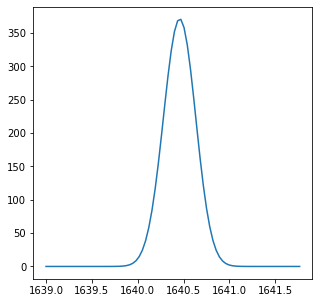

In [28]:
plt.figure(figsize=(5,5))
plt.plot(wvl4, np.convolve(A42,B24,'same'))

In [29]:
integrate.simps(np.convolve(A41,B24,'same'),wvl4)

45.32664720315401

In [30]:
integrate.simps(np.convolve(A42,B14,'same'),wvl4)

161.7499684069386

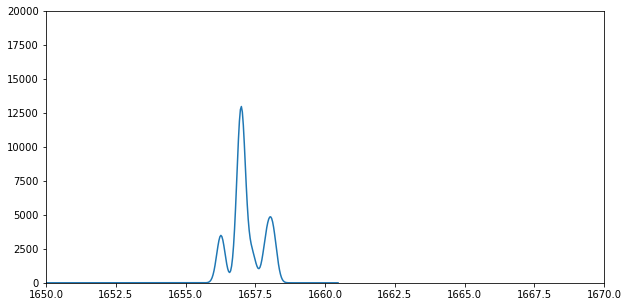

In [39]:
c1 = ch.ion('c_1',temperature=15848.0,eDensity=1.e+11,em=3.5e+30)
wvl5=1650. + 0.035*np.arange(300)
c1.spectrum(wvl5,(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl5, c1.Spectrum['intensity'])
plt.xlim([1650,1670])
plt.ylim([0,20000])
plt.show()

In [40]:
B25=c1.Spectrum['intensity']

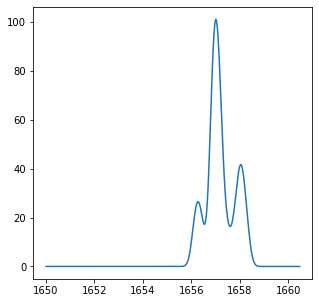

In [41]:
plt.figure(figsize=(5,5))
plt.plot(wvl5,np.convolve(A51,B25,'same'))

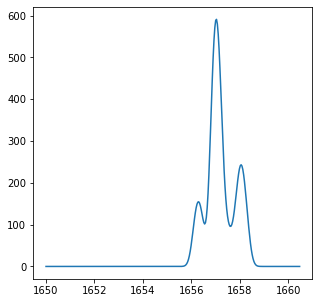

In [42]:
plt.figure(figsize=(5,5))
plt.plot(wvl5,np.convolve(A52,B25,'same'))

In [43]:
integrate.simps(np.convolve(A51,B25,'same'),wvl5)

94.89901642617204

In [44]:
integrate.simps(np.convolve(A52,B15,'same'),wvl5)

553.0050838804716

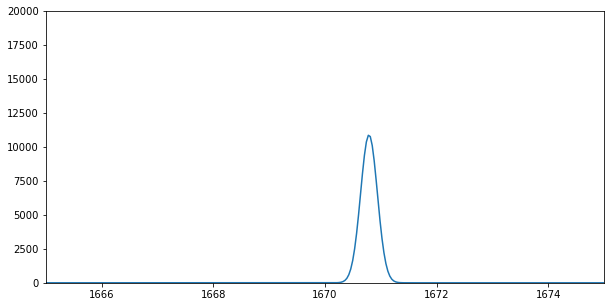

In [46]:
al2=ch.ion('al_2',temperature=31622.77,eDensity=1.e+11,em=1.e+29)
wvl6=1665.+ 0.035*np.arange(300)
#al2.spectrum(wvl6,(chfilters.boxcar,1))
al2.spectrum(wvl6,(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl6, al2.Spectrum['intensity'])
plt.xlim([1665,1675])
plt.ylim([0,20000])
plt.show()

In [48]:
B26=al2.Spectrum['intensity']

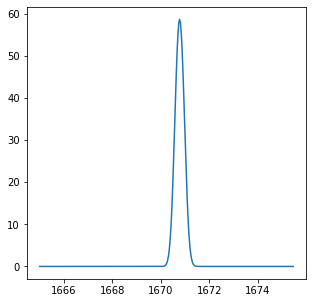

In [49]:
plt.figure(figsize=(5,5))
plt.plot(wvl6,np.convolve(A61,B26,'same'))

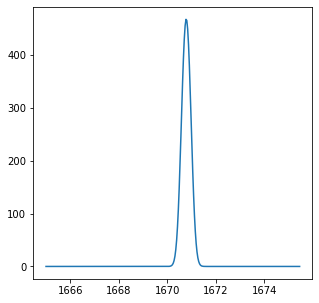

In [50]:
plt.figure(figsize=(5,5))
plt.plot(wvl6,np.convolve(A62,B26,'same'))

In [51]:
integrate.simps(np.convolve(A61,B26,'same'),wvl6)

28.14814445681167

In [52]:
integrate.simps(np.convolve(A62,B26,'same'),wvl6)

225.0020269292108

In [54]:
fe2=ch.ion('fe_2',temperature=31622.77,eDensity=1.e+11,em=8.e+30)


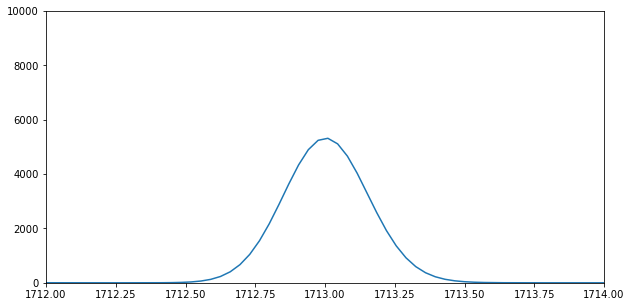

In [56]:
wvl7=1710.+ 0.035*np.arange(275)
fe2.spectrum(wvl7,(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl7, fe2.Spectrum['intensity'])
plt.xlim([1712,1714])
plt.ylim([0,10000])
plt.show()

In [60]:
B27=fe2.Spectrum['intensity']

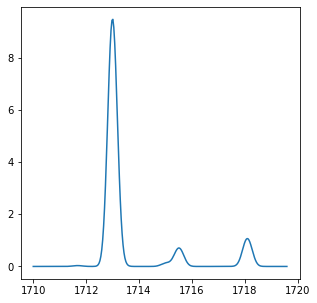

In [61]:
plt.figure(figsize=(5,5))
plt.plot(wvl7,np.convolve(A71,B27,'same'))

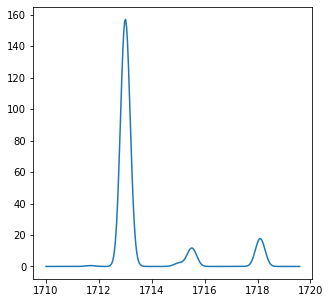

In [62]:
plt.figure(figsize=(5,5))
plt.plot(wvl7,np.convolve(A72,B27,'same'))

In [63]:
integrate.simps(np.convolve(A71,B27,'same')[70:120],wvl7[70:120])

4.2675316461307204

In [64]:
integrate.simps(np.convolve(A72,B27,'same')[70:120],wvl7[70:120])

70.7766407976311

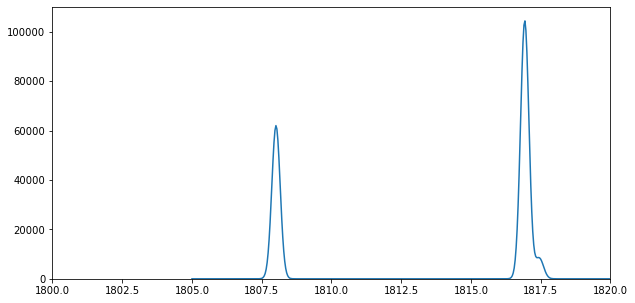

In [67]:
si2=ch.ion('si_2',temperature=31622.77,eDensity=1.e+11,em=1.e+30)
wvl8=1805.+ 0.035*np.arange(450)
si2.spectrum(wvl8,filter=(chfilters.gaussian,0.15))
plt.figure(figsize=(10,5))
plt.plot(wvl8,si2.Spectrum['intensity'])
plt.xlim([1800,1820])
plt.ylim([0,110000])
plt.show()

In [69]:
B28=si2.Spectrum['intensity']

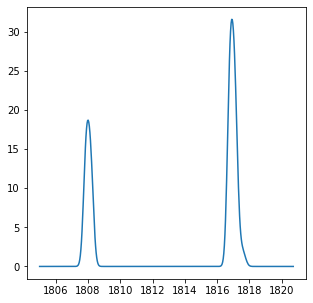

In [70]:
plt.figure(figsize=(5,5))
plt.plot(wvl8,np.convolve(A81,B28,'same'))

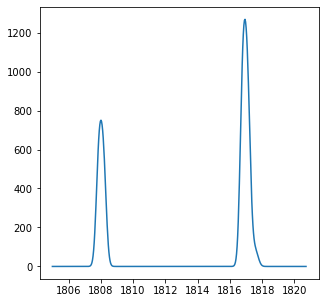

In [72]:
plt.figure(figsize=(5,5))
plt.plot(wvl8,np.convolve(A82,B28,'same'))

In [73]:
integrate.simps(np.convolve(A81,B28,'same')[50:150],wvl8[50:150])

11.093395517968593

In [74]:
integrate.simps(np.convolve(A82,B28,'same')[50:150],wvl8[50:150])

446.34687548356294

In [75]:
integrate.simps(np.convolve(A81,B28,'same')[300:400],wvl8[300:400])

20.172682330490964

In [76]:
integrate.simps(np.convolve(A82,B28,'same')[300:400],wvl8[300:400])

811.655341572619

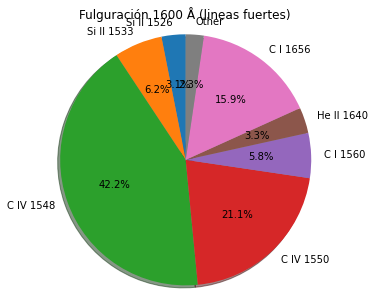

In [13]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Si II 1526', 'Si II 1533', 'C IV 1548', 'C IV 1550', 'C I 1560','He II 1640','C I 1656','Other'
sizes = [3.1, 6.2, 42.2, 21.1,5.8,3.3,15.9,2.32]
explode = (0, 0, 0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fulguración 1600 Å (lineas fuertes)')
plt.savefig('pie_chart_1600_F.jpg')
plt.show() 

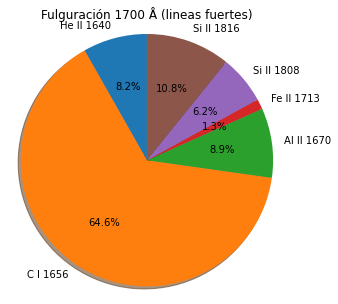

In [14]:
labels = 'He II 1640', 'C I 1656', 'Al II 1670', 'Fe II 1713', 'Si II 1808','Si II 1816'
sizes = [8.2, 64.5, 8.9, 1.3,6.2,10.8]
explode = (0, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fulguración 1700 Å (lineas fuertes)')
plt.savefig('pie_chart_1700_F.jpg')
plt.show() 

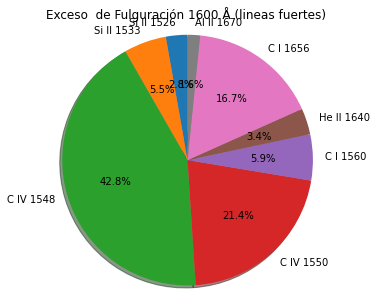

In [16]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Si II 1526', 'Si II 1533', 'C IV 1548', 'C IV 1550', 'C I 1560','He II 1640','C I 1656','Al II 1670'
sizes = [2.77, 5.46, 42.49, 21.22,5.91,3.35,16.60,1.59]
explode = (0, 0, 0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Exceso  de fulguración 1600 Å (lineas fuertes)')
plt.savefig('pie_chart_1600_FE.jpg')
plt.show()

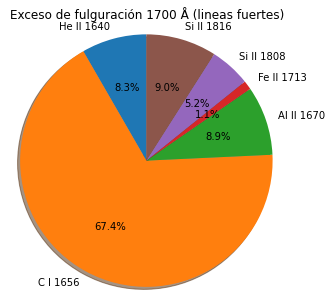

In [20]:
labels = 'He II 1640', 'C I 1656', 'Al II 1670', 'Fe II 1713', 'Si II 1808','Si II 1816'
sizes = [8.32, 67.41, 8.88, 1.14,5.21,9.02]
explode = (0, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Exceso de fulguración 1700 Å (lineas fuertes)')
plt.savefig('pie_chart_1700_FE.jpg')
plt.show() 